In [141]:
using Random
using LinearAlgebra
using PyPlot

Solving environment: ...working... done

## Package Plan ##

  environment location: /Users/emiliano/.julia/conda/3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h1c322ee_7          18 KB  conda-forge
    brotli-bin-1.0.9           |       h1c322ee_7          17 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    fonttools-4.33.3           |   py39h9eb174b_0         1.6 MB  conda-forge
    freetype-2.10.4            |       h17b34a0_1         874 KB  conda-forge
    giflib-5.2.1               |       h27ca646_2          72 KB  conda-forge
    jpeg-9e                    |       h1c322ee_1         259 KB  conda-forge
    kiwisolver-1.4.2           |   py39h2c803a9_1          60 KB  conda-forge
    lcms2-2.12                 |       had6a04f_0         369 KB  conda

┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/emiliano/.julia/packages/PyCall/7a7w0/src/PyCall.jl:711
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/emiliano/.julia/packages/Conda/x2UxR/src/Conda.jl:127


In [20]:
Random.seed!(23);

# Crear las estaciones y sus asignaciones aleatoriamente
n = 4;
z = sortslices(rand(n,2), dims = 1);
print(z)
d = round.(10*rand(n))
print(d)

[0.11065632044451257 0.27006522593555227; 0.1880809118159239 0.16919570156457864; 0.6625671095137617 0.8105816702610265; 0.89811953972284 0.2242572399601891][9.0, 7.0, 3.0, 2.0]

In [7]:
print(z)

[0.11065632044451257 0.27006522593555227; 0.1880809118159239 0.16919570156457864; 0.6625671095137617 0.8105816702610265; 0.89811953972284 0.2242572399601891]

In [2]:
# Repetir los puntos z_i, d_i veces (para la distribución)
p = repeat(z[1,:]', Int(d[1]))
for i in 2:n
    p = vcat(p, repeat(z[i,:]', Int(d[i])) )
end
print(p)

[0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.11065632044451257 0.27006522593555227; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.1880809118159239 0.16919570156457864; 0.6625671095137617 0.8105816702610265; 0.6625671095137617 0.8105816702610265; 0.6625671095137617 0.8105816702610265; 0.89811953972284 0.2242572399601891; 0.89811953972284 0.2242572399601891]

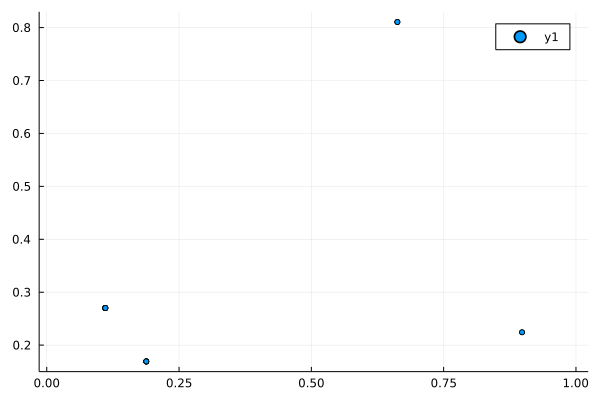

In [3]:
using Plots
scatter(p[:,1], p[:,2], aspect_ratio=:equal, markersize = 3, legend = :topright) #Grafica los origenes, con color por destino

In [4]:
using KernelDensity
B = kde(p)

BivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(-0.002488001829349315:0.003975497505200201:1.0112638619967018, 0.02179015804297943:0.003671361002900573:0.9579872137826256, [8.164194813362231e-10 1.4037189842571948e-9 … 2.6818176992278106e-10 4.702131988897768e-10; 4.61876561411341e-10 7.938390323238877e-10 … 1.5200086496544238e-10 2.662104148232203e-10; … ; 2.4835294110136814e-9 4.269742602286842e-9 … 8.156353352049492e-10 1.4303217524768395e-9; 1.4353117706411393e-9 2.4677328542156013e-9 … 4.713753551713589e-10 8.266122819870422e-10])

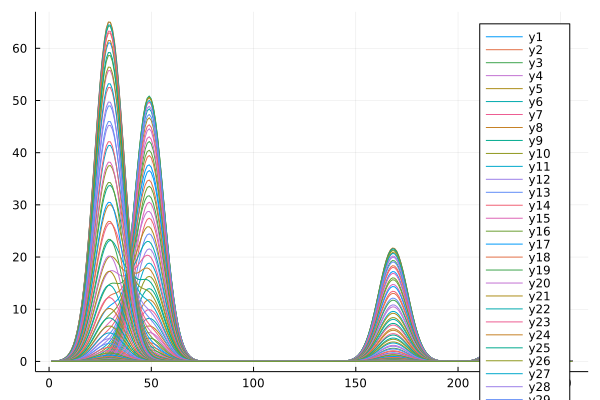

In [5]:
plot(B.density)

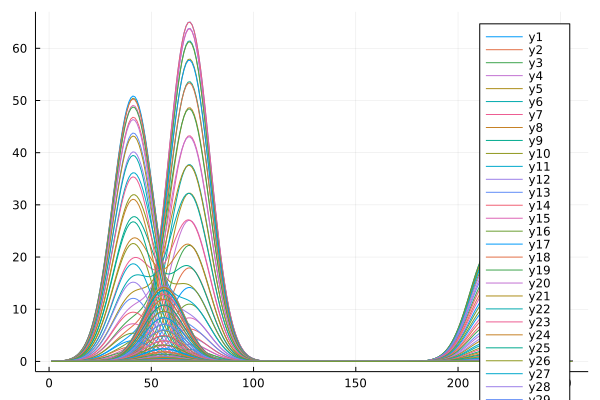

In [6]:
plot(B.density')

In [ ]:
# Define a loss function

function lossGradient(x)
end function

In [117]:
# Defino la función de distribución normal multivariada
function multivariate_normal_distribution(x,mu,Sigma)
    return [det(2*pi*Sigma)^(-1/2)*exp(-1/2*(x[:,i]-mu)'*Sigma*(x[:,i]-mu)); for i = 1:size(x)[2]]
end

multivariate_normal_distribution (generic function with 1 method)

In [150]:
Sigma1 = [1 0; 0 1];
Sigma2 = Sigma1;
mu1 = [0.25; 0.25];
mu2 = [0.75; 0.75]
n = 100;
x = sortslices(rand(n,2), dims = 1);

In [161]:
z = 1/sqrt(2)*multivariate_normal_distribution(x', mu1, Sigma1) + 1/sqrt(2)*multivariate_normal_distribution(x', mu2, Sigma2)

100-element Vector{Float64}:
 0.17223631401794648
 0.18045864371752207
 0.18622861671317428
 0.1727002909681143
 0.18884626528802106
 0.1889581499163151
 0.18814342078686025
 0.19261835287555423
 0.19258359310956302
 0.19518352798263416
 0.19268592354001446
 0.1838939285113801
 0.19768311593369137
 ⋮
 0.18319553003333988
 0.19604794780279122
 0.1918616739456212
 0.19500031897991843
 0.19511331629875073
 0.1927595989764853
 0.18836118278887654
 0.1903060717365324
 0.17693255346091058
 0.17630571907799386
 0.18519554247403208
 0.18809494093461956

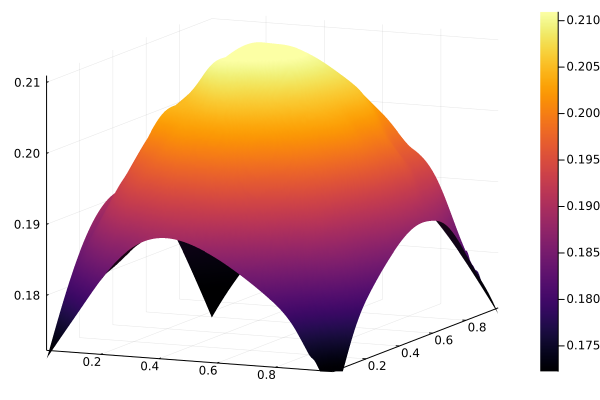

In [162]:
plot(x[:,1], x[:,2], z,st=:surface)